# Visualization

> Visualization tools for spectroscopic data.

In [1]:
#| default_exp visualization

In [2]:
#| hide
%load_ext autoreload
%autoreload 2

In [3]:
#| export
from matplotlib import pyplot as plt
import numpy as np

Let's load some data to get started using the soilspecdata package.

In [14]:
#| eval: false
from soilspecdata.datasets.ossl import get_ossl
from sklearn.pipeline import Pipeline
from soilspectfm.core import SNV
from soilspectfm.utils import load_toy_mir

In [15]:
#| exports
deep_blue, blue, orange, red = '#0571b0', '#92c5de', '#f4a582', '#ca0020'

In [16]:
#| exports
def plot_spectra(
    X: np.ndarray, # Array of shape (n_samples, n_features) containing spectral data
    w: np.ndarray, # Array of wavelengths/wavenumbers corresponding to spectral features
    sample: int = 50, # Number of spectra to randomly sample (if None, plot all spectra)
    ascending: bool = True, # Whether to plot wavelengths/wavenumbers in ascending order
    ax: plt.Axes = None, # Optional matplotlib axes for plotting. If None, creates new figure
    **kwargs # Additional parameters for plot customization
) -> plt.Axes:
    """Plot spectral data with customizable matplotlib parameters."""
    def _prepare_data(X: np.ndarray, sample: int) -> np.ndarray:
        """Prepare data for plotting by sampling and reshaping if needed."""
        if len(X.shape) == 1:
            return X.reshape(1, -1)
        if sample is not None:
            idx = np.random.randint(X.shape[0], size=sample)
            return X[idx,:]
        return X

    def _setup_axes(w: np.ndarray, ascending: bool, ax: plt.Axes, **params) -> plt.Axes:
        """Setup the axes with basic parameters."""
        if ax is None:
            _, ax = plt.subplots(figsize=params.get('figsize', (20, 4)))
        
        _min, _max = np.min(w), np.max(w)
        _order = [_min, _max] if ascending else [_max, _min]
        ax.set_xlim(*_order)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.locator_params(axis="x", nbins=20)
        return ax

    def _set_labels(ax: plt.Axes, **params) -> None:
        """Set axes labels and title."""
        ax.set_xlabel(params.get('xlabel', 'Wavenumber'))
        ax.set_ylabel(params.get('ylabel', 'Absorbance'))
        if params.get('title'):
            ax.set_title(params.get('title'))

    # Separate figure-level and line-level parameters
    fig_params = {
        'figsize': kwargs.pop('figsize', (20, 4)),
        'xlabel': kwargs.pop('xlabel', 'Wavenumber'),
        'ylabel': kwargs.pop('ylabel', 'Absorbance'),
        'title': kwargs.pop('title', None)
    }

    # Set defaults for line parameters
    line_params = {
        'alpha': 0.6,
        'color': '#333',
        'lw': 1
    }
    line_params.update(kwargs)

    # Execute plotting sequence
    X = _prepare_data(X, sample)
    ax = _setup_axes(w, ascending, ax, **fig_params)
    
    for spectrum in X:
        ax.plot(w, spectrum, **line_params)
    
    _set_labels(ax, **fig_params)
    
    return ax

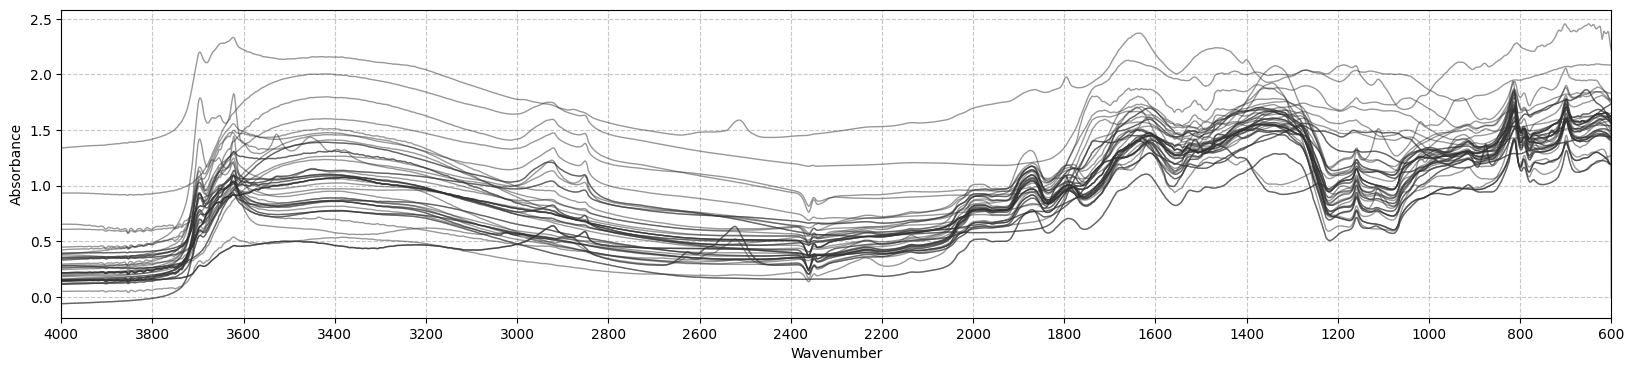

In [17]:
#| eval: false
X, ws = load_toy_mir()
ax = plot_spectra(X, ws, ascending=False, alpha=0.5)

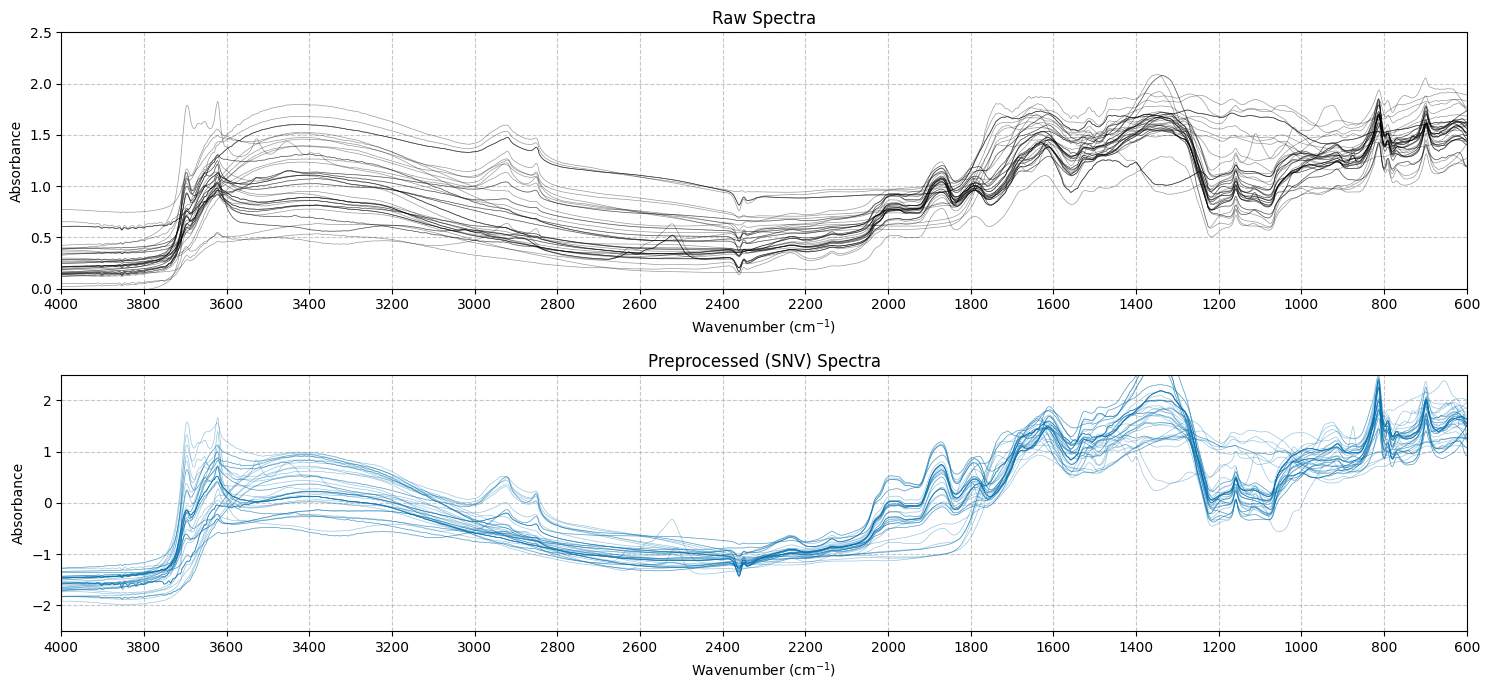

In [18]:
#| eval: false
# Create subplots and customize them
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 7))

# Plot raw spectra on first subplot
ax1 = plot_spectra(
    X, 
    ws,
    ax=ax1,
    ascending=False,
    color='black',
    alpha=0.4,
    lw=0.5,
    xlabel='Wavenumber (cm$^{-1}$)',
    title='Raw Spectra'
)

# Plot preprocessed spectra on second subplot
ax2 = plot_spectra(
    SNV().fit_transform(X),
    ws,
    ax=ax2,
    ascending=False,
    color=deep_blue,
    alpha=0.4,
    lw=0.5,
    xlabel='Wavenumber (cm$^{-1}$)',
    title='Preprocessed (SNV) Spectra'
)

# Further customize if needed
ax1.set_ylim(0, 2.5)
ax2.set_ylim(-2.5, 2.5)
plt.tight_layout()



Or abstracting the plotting into a function for demonstration purposes (and convenience):

In [19]:
#| exports
def plot_spectra_comparison(
    X_raw: np.ndarray,
    X_transformed: np.ndarray,
    wavenumbers: np.ndarray,
    raw_title: str = 'Raw Spectra',
    transformed_title: str = 'Transformed Spectra',
    figsize: tuple = (15, 7),
    **kwargs):
    "Plot raw and transformed spectra for comparison."
    raw_color = kwargs.pop('raw_color', 'black')
    transformed_color = kwargs.pop('transformed_color', 'steelblue')
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    
    common_params = {
        'ascending': False,
        'alpha': kwargs.pop('alpha', 0.6),
        'lw': kwargs.pop('lw', 0.5),
        'xlabel': 'Wavenumber (cm$^{-1}$)',
        **kwargs
    }
    
    # Plot raw spectra
    ax1 = plot_spectra(
        X_raw,
        wavenumbers,
        ax=ax1,
        color=raw_color,
        title=raw_title,
        **common_params
    )
    
    # Plot transformed spectra
    ax2 = plot_spectra(
        X_transformed,
        wavenumbers,
        ax=ax2,
        color=transformed_color,
        title=transformed_title,
        **common_params
    )
    
    plt.tight_layout()
    return fig, (ax1, ax2)

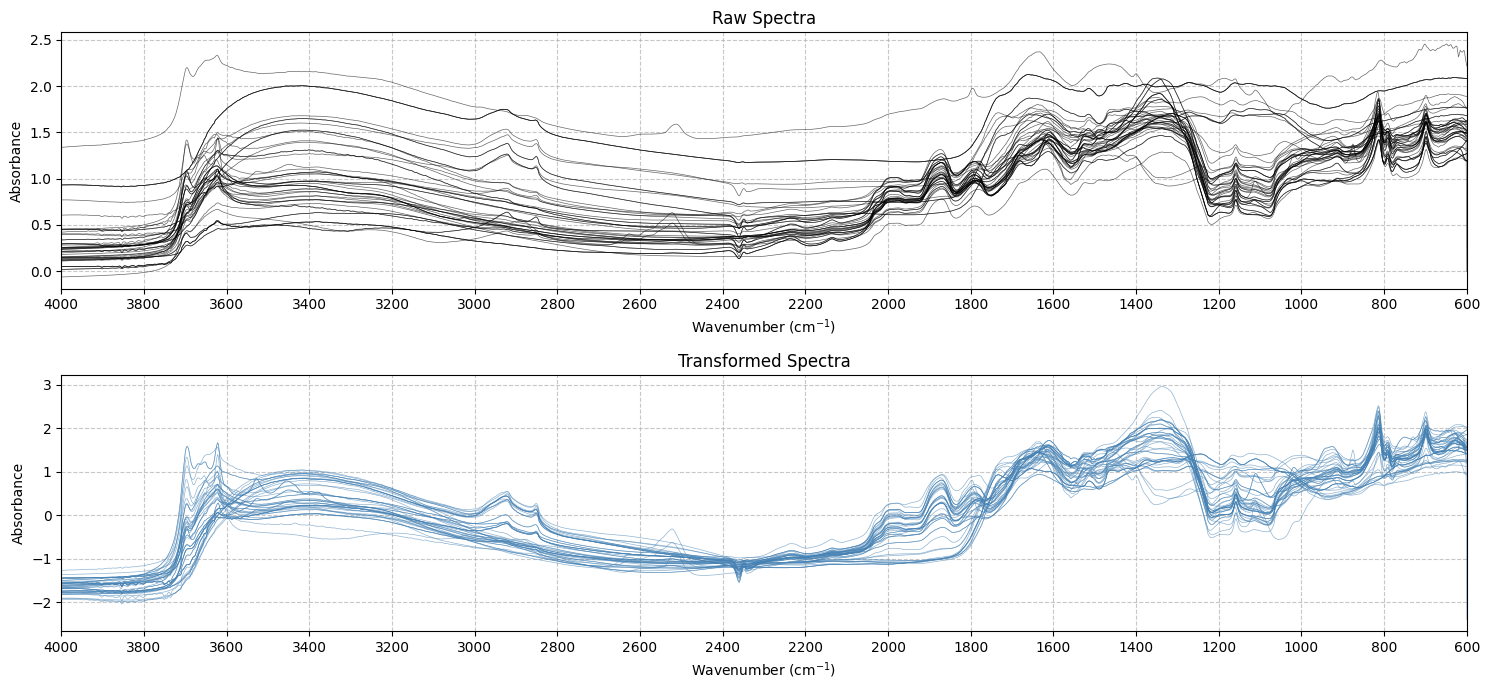

In [20]:
#| eval: false
plot_spectra_comparison(
    X,
    SNV().fit_transform(X),
    ws,
    raw_title='Raw Spectra',
    transformed_title='Transformed Spectra'
);